In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c whale-categorization-playground -p /content/
!unzip /content/whale-categorization-playground.zip -d /content/


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open /content/whale-categorization-playground.zip, /content/whale-categorization-playground.zip.zip or /content/whale-categorization-playground.zip.ZIP.


##Cargar librerías y datos

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/sample_submission.csv')

# Datos principales
print("Entrenamiento:", df.shape)
print("Test:", test_df.shape)
print("Clases únicas:", df['Id'].nunique())


Entrenamiento: (9850, 2)
Test: (15610, 2)
Clases únicas: 4251


Distribución de imágenes por ballena (clase)

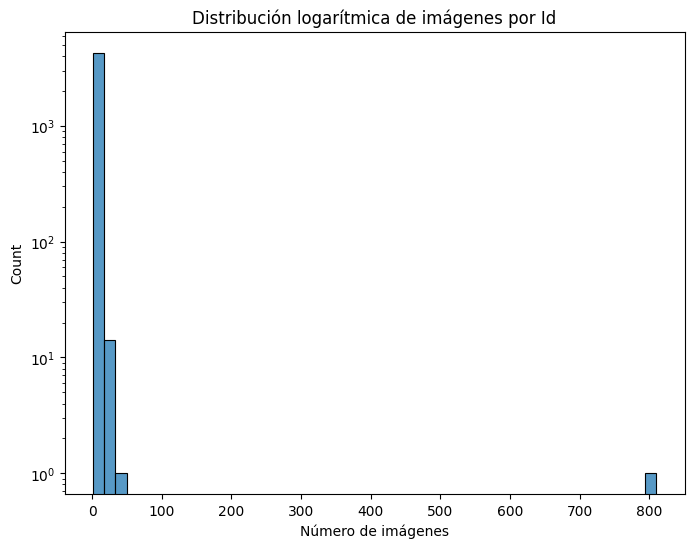

In [ ]:
counts = df['Id'].value_counts()
plt.figure(figsize=(8,6))
sns.histplot(counts, bins=50)
plt.yscale('log')
plt.title('Distribución logarítmica de imágenes por Id')
plt.xlabel('Número de imágenes')
plt.show()


Top 10 ballenas más frecuentes

/tmp/ipython-input-9-312246527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


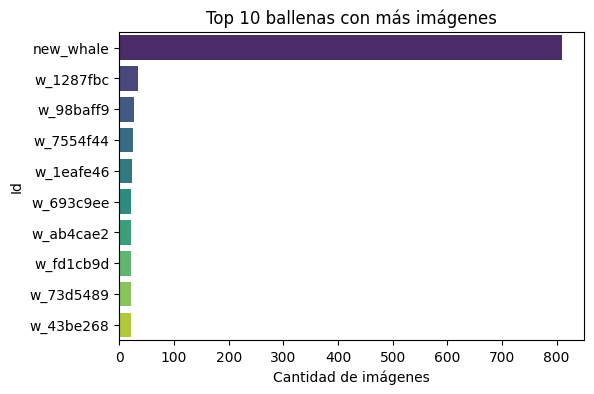

In [ ]:
top10 = counts.head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 ballenas con más imágenes')
plt.xlabel('Cantidad de imágenes')
plt.ylabel('Id')
plt.show()


Tamaño de las imágenes

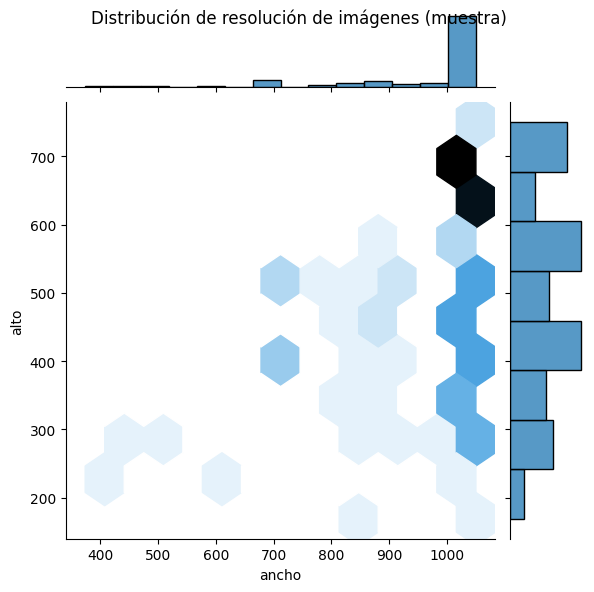

In [ ]:
sample_imgs = df['Image'].sample(100).values
sizes = [cv2.imread(f'/content/train/{img}').shape[:2] for img in sample_imgs]
sizes = pd.DataFrame(sizes, columns=['alto','ancho'])
sizes.describe()

sns.jointplot(x='ancho', y='alto', data=sizes, kind='hex', height=6)
plt.suptitle('Distribución de resolución de imágenes (muestra)')
plt.show()


 Mostrar algunas imágenes de entrenamiento

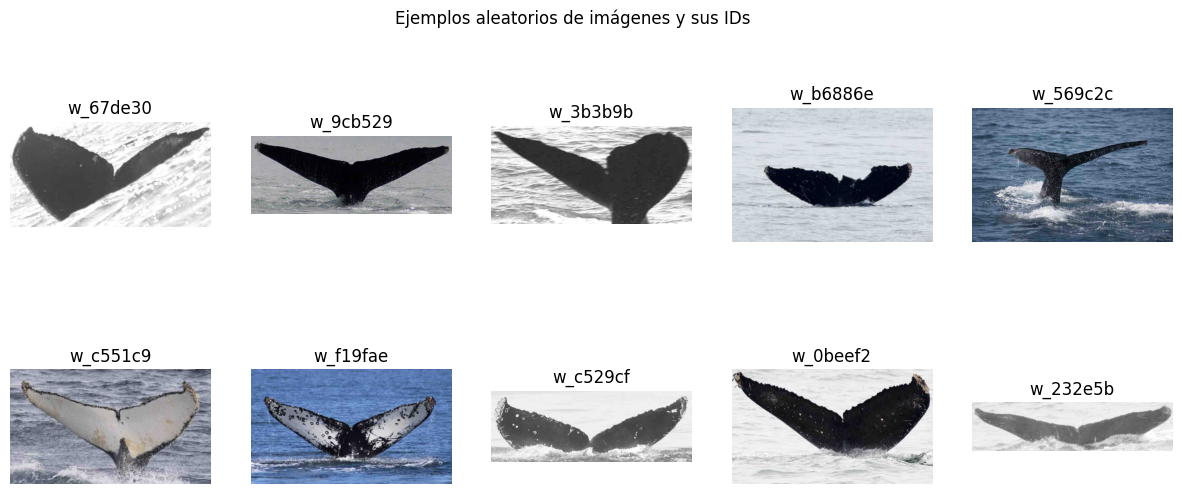

In [ ]:
sample = df.sample(10)
fig, axes = plt.subplots(2,5, figsize=(15,6))
for ax, (_, row) in zip(axes.flat, sample.iterrows()):
    img = cv2.imread(f"/content/train/{row['Image']}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(row['Id'][:8])
    ax.axis('off')
plt.suptitle('Ejemplos aleatorios de imágenes y sus IDs')
plt.show()


Análisis de ‘new_whale’ en la muestra

In [ ]:
has_new = 'new_whale' in df['Id'].values
print("¿new_whale en entrenamiento?", has_new)


¿new_whale en entrenamiento? True


Recuento de ‘new_whale’ en test

In [ ]:
new_whale_count = 'new_whale' in test_df['Id'].values if 'Id' in test_df else None
print("new_whale presente en submission file sample:", new_whale_count)


new_whale presente en submission file sample: False


Visualización de distribución de clases (barra log)

/tmp/ipython-input-14-2255201376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index[:20], y=np.log1p(counts.values[:20]), palette='magma')


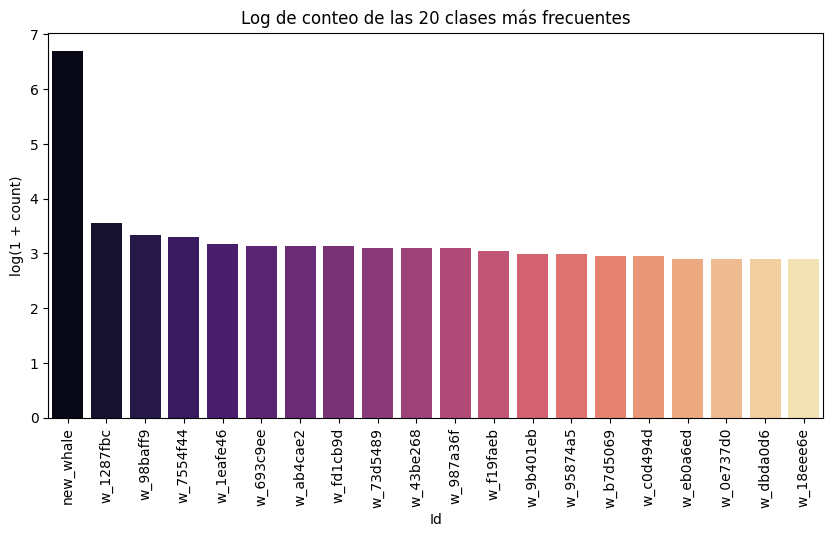

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=counts.index[:20], y=np.log1p(counts.values[:20]), palette='magma')
plt.xticks(rotation=90)
plt.title('Log de conteo de las 20 clases más frecuentes')
plt.ylabel('log(1 + count)')
plt.show()
